# Demo plots of the psy-reg plugin

In [1]:
import psyplot.project as psy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline

In [2]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.subplot.left'] = 0.12
plt.rcParams['figure.subplot.right'] = 0.92
plt.rcParams['figure.subplot.bottom'] = 0.12
plt.rcParams['figure.subplot.top'] = 0.92
plt.rcParams['figure.figsize'] = (5, 4)

In [3]:
x = np.linspace(0, 100)
y = x * 4 + 30 + 50* np.random.normal(size=x.size)
ds = xr.Dataset({'x': xr.Variable(('experiment', ), x),
                 'y': xr.Variable(('experiment', ), y)})
ds

<xarray.Dataset>
Dimensions:  (experiment: 50)
Dimensions without coordinates: experiment
Data variables:
    x        (experiment) float64 0.0 2.041 4.082 6.122 ... 95.92 97.96 100.0
    y        (experiment) float64 18.28 33.26 72.36 36.88 ... 343.2 465.4 338.6

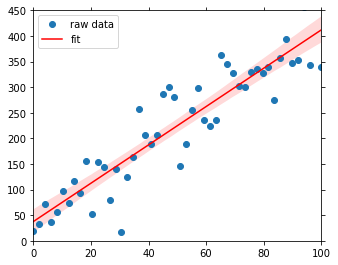

In [4]:
raw = psy.plot.lineplot(
    ds, name='y', coord='x', linewidth=0, marker='o', legendlabels='raw data',
    legend='upper left')
fit = psy.plot.linreg(ds, ax=raw.plotters[0].ax, name='y', coord='x',
                      legendlabels='fit', color='red')
fit.share(raw[0], keys='legend')
pdf = fit.export('psy-reg-demo.pdf', close_pdf=False)

In [5]:
all_x = []
all_y = []
for i in range(5):
    deviation = np.abs(np.random.normal())
    all_x.append(np.linspace(-np.pi - deviation, np.pi + deviation))
    all_y.append(np.sin(all_x[-1]) + np.random.normal(scale=0.5, size=all_x[-1].size))
x = np.concatenate(all_x)
y = np.concatenate(all_y)
ds2 = xr.Dataset({'x': xr.Variable(('experiment', ), x),
                 'y': xr.Variable(('experiment', ), y)})
ds2


<xarray.Dataset>
Dimensions:  (experiment: 250)
Dimensions without coordinates: experiment
Data variables:
    x        (experiment) float64 -4.148 -3.978 -3.809 ... 4.642 4.848 5.055
    y        (experiment) float64 0.128 1.08 1.664 ... -0.8318 -1.133 -0.3443

/Users/psommer/Documents/myplots-scripts/psy-reg/psy_reg/utils.py:88: RuntimeWarning: Need finite parameter boundaries for automatic initial parameter estimation!
  RuntimeWarning)


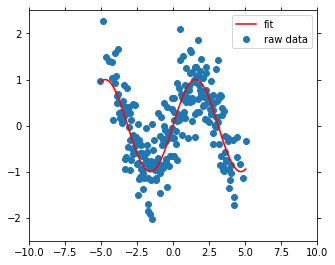

In [6]:
raw = psy.plot.lineplot(
    ds2, name='y', coord='x', linewidth=0, marker='o', legendlabels='raw data',
    legend='upper right')
fit = psy.plot.linreg(ds2, ax=raw.plotters[0].ax, name='y', coord='x',
                      legendlabels='fit', color='red',
                      fit=lambda x, a: np.sin(a * x))
fit.share(raw[0], keys=['legend', 'xlim', 'ylim'])
fit.export(pdf)

In [7]:
x = np.linspace(0, 100)
x = np.concatenate([x] * 5)
y = x * 4 + 30 + 50* np.random.normal(size=x.size)

ds = xr.Dataset({'x': xr.Variable(('experiment', ), x),
                 'y': xr.Variable(('experiment', ), y)})
ds = ds.to_dataframe().sample(frac=0.1).to_xarray()

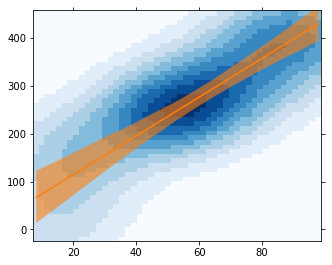

In [8]:
p = psy.plot.densityreg(
    ds, name='y', coord='x', cmap='Blues', bins=50, density='kde',
    clabel='Kernel density', cbar='', legend=False,
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1], 
    linewidth=4, erroralpha=0.6,
    xlim='minmax', ylim='minmax')
p.export(pdf)

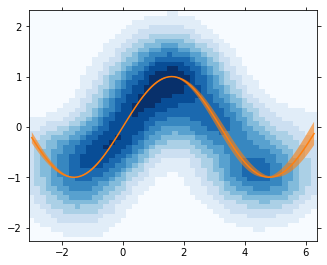

In [9]:
all_x = []
all_y = []
for i in range(3):
    deviation = np.abs(np.random.normal())
    all_x.append(np.linspace(-np.pi - deviation, np.pi + deviation))
    all_x[-1] += 3 * np.random.random_sample(size=all_x[-1].size)
    all_y.append(np.sin(all_x[-1]) + np.random.normal(scale=0.5, size=all_x[-1].size))
x = np.concatenate(all_x)
y = np.concatenate(all_y)
ds = xr.Dataset({'x': xr.Variable(('experiment', ), x),
                 'y': xr.Variable(('experiment', ), y)})
ds

p = psy.plot.densityreg(
    ds, name='y', coord='x', cmap='Blues', bins=50, density='kde',
    clabel='Kernel density', xlim='minmax', ylim='minmax',
    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][1], 
    fit=lambda x, a: np.sin(a * x), cbar='', erroralpha=0.6,
    legend=False)
p.export(pdf)

In [10]:
pdf.close()